## Holiday Package Problem

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [111]:
df = pd.read_csv('Datasets/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data Cleaning

1. Handle Missing Values
2. Handle Duplicate Values
3. Check Data Type
4. Understand the dataset

In [112]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [114]:
## Check for Null Values:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [115]:
df.isnull().sum()
#Check all the categories
df['Gender'] = df['Gender'].str.replace('Fe Male', 'Female')
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [116]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [117]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [118]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [119]:
df['MaritalStatus'] = df['MaritalStatus'].str.replace('Single', 'Unmarried')
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64

In [120]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [121]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [122]:
##Check missing values
features_with_na = [features for features in df.columns if df[features].isnull().sum() >= 1]

In [123]:
features_with_na

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [124]:
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean() * 100, 5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [125]:
##Statistics on numerical values
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing null values
1. Impute Meadian value for Age Column
2. Impute Mode Value for Type of Contract
3. Impute Median for Duration of Pitch
4. Impute Mode for Number of FollowUp as it is Discrete feature
5. Impute Mode for Preferred Property Star
6. Impute Median for Number of trips
7. Impute Mode for Number of Children Visiting
8. Impute Median for MonthlyIncome

In [126]:
# Age - Median
df.Age.fillna(df.Age.median(), inplace=True)

# Type of Contact - Mode
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

# Duration of Pitch - Median
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

# Number of Followups - Mode
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

# Preferred Property Star - Mode
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

# Number of Trips - Median
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

# Number of Children Visiting - Mode
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

# Monthly Income - Median
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [127]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [128]:
df.drop('CustomerID', inplace=True, axis=1)

In [129]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [130]:
#Create new column for feature
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], inplace=True, axis=1)

In [131]:
##Get all numeric features
num_features = [features for features in df.columns if df[features].dtype != 'O']
print(f"Number of numerical features: {len(num_features)}")
##Get all Categorical features
cat_features = [features for features in df.columns if df[features].dtype == 'O']
print(f"Number of Categorical features: {len(cat_features)}")
#discrete features
discrete_features = [features for features in num_features if len(df[features].unique()) <= 25]
print(f"Number of Discrete features: {len(discrete_features)}")
#Continous features
continous_features = [features for features in num_features if features not in discrete_features]
print(f"Number of Continous features: {len(continous_features)}")

Number of numerical features: 12
Number of Categorical features: 6
Number of Discrete features: 9
Number of Continous features: 3


In [132]:
from sklearn.model_selection import train_test_split

X = df.drop(['ProdTaken'], axis=1)
y = df['ProdTaken']
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [134]:
X_train.shape, X_test.shape, y_train.shape

((3421, 17), (1467, 17), (3421,))

In [135]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

## Create Column Transformer with 3 types of transformers
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns


numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

ct = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])

In [136]:
X_train = ct.fit_transform(X_train)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.714031,-0.649789,0.280718,-0.727208,-1.217370,-0.632714,1.409081,0.781435,0.460318,-0.067869
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.714031,-0.527737,-0.719632,1.768057,1.504605,-0.632714,1.409081,-1.279697,-1.005668,-0.777901
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.161582,1.281068,1.768057,-0.672975,1.580492,-0.046813,0.781435,-1.209722,-0.067869
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.470853,-0.771841,0.280718,0.520424,-0.128580,1.580492,-0.046813,0.781435,-0.017750,0.642163
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.527737,1.281068,0.520424,2.593396,-0.632714,0.681134,-1.279697,-0.423411,-0.067869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.714031,-0.649789,1.281068,-0.727208,-0.672975,-0.632714,-1.502707,0.781435,-0.531926,0.642163
3417,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.470853,-0.893893,-0.719632,1.768057,-1.217370,-0.632714,1.409081,0.781435,1.512744,-0.067869
3418,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.470853,1.547143,0.280718,-0.727208,2.049001,-0.632714,-0.774760,0.781435,-0.357400,0.642163
3419,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.470853,1.791246,1.281068,-0.727208,-0.128580,-0.632714,-1.502707,0.781435,-0.250765,0.642163


In [137]:
X_test = ct.transform(X_test)

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boost": GradientBoostingClassifier(),
    "Ada Boost": AdaBoostClassifier()
}
for key, value in models.items():
    print(f'key:{key} and value:{value}')

key:Logistic Regression and value:LogisticRegression()
key:Random Forest and value:RandomForestClassifier()
key:Decision Tree and value:DecisionTreeClassifier()
key:Gradient Boost and value:GradientBoostingClassifier()
key:Ada Boost and value:AdaBoostClassifier()


In [139]:
list(models)

['Logistic Regression',
 'Random Forest',
 'Decision Tree',
 'Gradient Boost',
 'Ada Boost']

In [140]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  #Train model

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # -------------------- Training Metrics --------------------
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_auc = roc_auc_score(y_train, y_train_pred)

    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_class_report = classification_report(y_train, y_train_pred)

    print(f'Model : {list(models.keys())[i]}')

    print("\n===== TRAINING METRICS =====")
    print(f"Accuracy: {model_train_accuracy:.4f}")
    print(f"F1 Score: {model_train_f1:.4f}")
    print(f"Precision: {model_train_precision:.4f}")
    print(f"Recall: {model_train_recall:.4f}")
    print(f"AUC: {model_train_auc:.4f}")
    # print("\nConfusion Matrix:\n", train_conf_matrix)
    # print("\nClassification Report:\n", train_class_report)

    # -------------------- Test Metrics --------------------
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_auc = roc_auc_score(y_test, y_test_pred)

    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_class_report = classification_report(y_test, y_test_pred)

    print("\n===== TEST METRICS =====")
    print(f"Accuracy: {model_test_accuracy:.4f}")
    print(f"F1 Score: {model_test_f1:.4f}")
    print(f"Precision: {model_test_precision:.4f}")
    print(f"Recall: {model_test_recall:.4f}")
    print(f"AUC: {model_test_auc:.4f}")
    # print("\nConfusion Matrix:\n", test_conf_matrix)
    # print("\nClassification Report:\n", test_class_report)

    print("==" *30)

Model : Logistic Regression

===== TRAINING METRICS =====
Accuracy: 0.8451
F1 Score: 0.4252
Precision: 0.7101
Recall: 0.3034
AUC: 0.6373

===== TEST METRICS =====
Accuracy: 0.8432
F1 Score: 0.4279
Precision: 0.6719
Recall: 0.3139
AUC: 0.6393
Model : Random Forest

===== TRAINING METRICS =====
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
AUC: 1.0000

===== TEST METRICS =====
Accuracy: 0.9237
F1 Score: 0.7555
Precision: 0.9402
Recall: 0.6314
AUC: 0.8111
Model : Decision Tree

===== TRAINING METRICS =====
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
AUC: 1.0000

===== TEST METRICS =====
Accuracy: 0.9052
F1 Score: 0.7459
Precision: 0.7473
Recall: 0.7445
AUC: 0.8433
Model : Gradient Boost

===== TRAINING METRICS =====
Accuracy: 0.8948
F1 Score: 0.6477
Precision: 0.8803
Recall: 0.5124
AUC: 0.7481

===== TEST METRICS =====
Accuracy: 0.8766
F1 Score: 0.5800
Precision: 0.7962
Recall: 0.4562
AUC: 0.7147
Model : Ada Boost

===== TRAINING METRICS =====
A

In [150]:
## Hyperparameter Tuning
rf_params = {
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,'auto',8],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500,1000]
}

gradientboost_param={
    'loss':['log_loss','deviance','exponential'],
    'criterion':['friedman_mse','squared_error','mse'],
    'min_samples_split':[2,8,15,20],
    'max_depth':[5,8,15,None,10],
    'n_estimators':[100,200,500,1000]
}

adaboost_param={
    'n_estimators':[50,60,70,80,90],
    'algorithm':['SAMME','SAMME.R']
}

In [142]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [151]:
adaboost_param

{'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}

In [152]:
gradientboost_param

{'loss': ['log_loss', 'deviance', 'exponential'],
 'criterion': ['friedman_mse', 'squared_error', 'mse'],
 'min_samples_split': [2, 8, 15, 20],
 'max_depth': [5, 8, 15, None, 10],
 'n_estimators': [100, 200, 500, 1000]}

In [153]:
##Model list for Hyperparameter tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params),
    ("AB", AdaBoostClassifier(), adaboost_param),
    ("GradientBoost", GradientBoostingClassifier(), gradientboost_param)
]

In [154]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']}),
 ('GradientBoost',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'deviance', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error', 'mse'],
   'min_samples_split': [2, 8, 15, 20],
   'max_depth': [5, 8, 15, None, 10],
   'n_estimators': [100, 200, 500, 1000]})]

In [155]:
from sklearn.model_selection import RandomizedSearchCV
model_param={}
for name, model, param in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=param,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for modelname in model_param:
    print(f'---------- Best params for {modelname} ------------')
    print(model_param[modelname])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------- Best params for RF ------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
---------- Best params for AB ------------
{'n_estimators': 90, 'algorithm': 'SAMME'}
---------- Best params for GradientBoost ------------
{'n_estimators': 500, 'min_samples_split': 20, 'max_depth': 10, 'loss': 'log_loss', 'criterion': 'squared_error'}


In [156]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features=8, max_depth=None),
    "Ada Boost": AdaBoostClassifier(n_estimators=90, algorithm='SAMME'),
    "Gradient Boost": GradientBoostingClassifier(n_estimators= 500, min_samples_split= 20, max_depth= 10, loss= 'log_loss', criterion= 'squared_error')
}

In [158]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  #Train model

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # -------------------- Training Metrics --------------------
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_auc = roc_auc_score(y_train, y_train_pred)

    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_class_report = classification_report(y_train, y_train_pred)

    print(f'Model : {list(models.keys())[i]}')

    print("\n===== TRAINING METRICS =====")
    print(f"Accuracy: {model_train_accuracy:.4f}")
    print(f"F1 Score: {model_train_f1:.4f}")
    print(f"Precision: {model_train_precision:.4f}")
    print(f"Recall: {model_train_recall:.4f}")
    print(f"AUC: {model_train_auc:.4f}")
    # print("\nConfusion Matrix:\n", train_conf_matrix)
    # print("\nClassification Report:\n", train_class_report)

    # -------------------- Test Metrics --------------------
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_auc = roc_auc_score(y_test, y_test_pred)

    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_class_report = classification_report(y_test, y_test_pred)

    print("\n===== TEST METRICS =====")
    print(f"Accuracy: {model_test_accuracy:.4f}")
    print(f"F1 Score: {model_test_f1:.4f}")
    print(f"Precision: {model_test_precision:.4f}")
    print(f"Recall: {model_test_recall:.4f}")
    print(f"AUC: {model_test_auc:.4f}")
    # print("\nConfusion Matrix:\n", test_conf_matrix)
    # print("\nClassification Report:\n", test_class_report)

    print("==" *30)

Model : Random Forest

===== TRAINING METRICS =====
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
AUC: 1.0000

===== TEST METRICS =====
Accuracy: 0.9305
F1 Score: 0.7830
Precision: 0.9388
Recall: 0.6715
AUC: 0.8307
Model : Ada Boost

===== TRAINING METRICS =====
Accuracy: 0.8530
F1 Score: 0.4442
Precision: 0.7761
Recall: 0.3111
AUC: 0.6451

===== TEST METRICS =====
Accuracy: 0.8412
F1 Score: 0.3948
Precision: 0.6847
Recall: 0.2774
AUC: 0.6240
Model : Gradient Boost

===== TRAINING METRICS =====
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
AUC: 1.0000

===== TEST METRICS =====
Accuracy: 0.9496
F1 Score: 0.8543
Precision: 0.9274
Recall: 0.7920
AUC: 0.8889


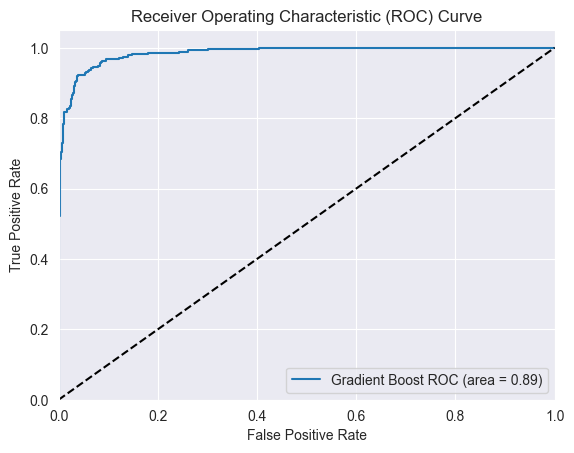

In [160]:
# Plot ROC AUC Curve
from sklearn.metrics import roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [{
    # 'label': 'Ada Boost',
    # 'model': AdaBoostClassifier(n_estimators=90, algorithm='SAMME'),
    'label': 'Gradient Boost',
    'model': GradientBoostingClassifier(n_estimators= 500, min_samples_split= 20, max_depth= 10, loss= 'log_loss', criterion= 'squared_error'),
    'auc': model_test_auc
}]

# Create loop through all the models
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)

    # Compute false positive rate and true positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

    # Plot ROC curve with AUC label
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], 'k--')

# Set axis limits, labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show legend
plt.legend(loc='lower right')

# Show plot
plt.show()
